In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import simpson


In [2]:
a=3
b=5

crit_cond = [
    np.pi/(2*(b-a)),
    lambda B: B*np.tan(B*a)-B/np.tan(B*(b-a)),
    lambda B: B*np.tanh(B*a)+B/np.tan(B*(b-a)),
    lambda B: B*np.tan(B*a)-B/np.tanh(B*(b-a))
]

In [3]:
B = [
    np.pi/(2*(b-a)),
    fsolve(crit_cond[1], x0 = 0.3)[0],       # fsolve finds the nearest root of the function to the guess value x0. so changing x0 might change the root found if the function ha multiple roots
    fsolve(crit_cond[2], x0 = 1)[0],         # fsolve gives an array even if the root is a number, so we take the first element of the array which corresponds to the root
    fsolve(crit_cond[3], x0 = 0.5)[0],
]
B

[0.7853981633974483,
 np.float64(0.31415926535897926),
 np.float64(1.1776704344223887),
 np.float64(0.34420510750208605)]

In [4]:
# we have found the values for B at criticality so we can plot the flux
A1=1
x1 = np.linspace(0,a,500)

phi_1 =[
    A1*np.ones_like(x1),
    A1*np.cos(B[1]*x1),
    A1*np.cosh(B[2]*x1),
    A1*np.cos(B[3]*x1)
]

fig = plt.figure(figsize=(6,4))

labels = ['Case1', 'Case2', 'Case3', 'Case4']




<Figure size 432x288 with 0 Axes>

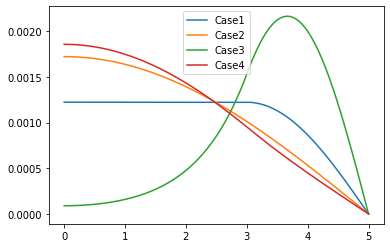

In [5]:
x2 = np.linspace(a,b,500)
phi_2=[
    A1*np.cos(B[0]*(x2-a)),
    A1*(np.cos(B[1]*a)*np.cos(B[1]*(x2-a))-np.sin(B[1]*a)*np.sin(B[1]*(x2-a))),
    A1*(np.cosh(B[2]*a)*np.cos(B[2]*(x2-a))+np.sinh(B[2]*a)*np.sin(B[2]*(x2-a))),
    A1*(np.cos(B[3]*a))*np.cosh(B[3]*(x2-a))-np.sin(B[3]*a)*np.sinh(B[3]*(x2-a))
]
#this is the normalized plot
for i in range(4):
    x = np.hstack([x1, x2])
    phi = np.hstack([phi_1[i], phi_2[i]])
    normalization = simpson(phi)
    plt.plot(x, phi/normalization, label =labels[i])
plt.legend()


Buckling values: 0.31418145530553054 (Precision = 0.00010089803403307007)
fsolve value 0.31415926535897926


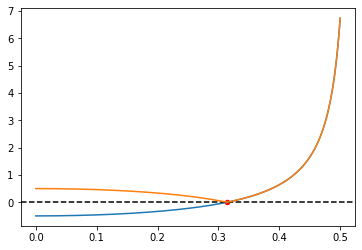

In [ ]:
# now we use another approach: we guess B and we use an iterative process to find the value of B that satisfies the criticality condition

B_guess = np.linspace(1e-7, 2, 1000)
B_guess = np.linspace(1e-7, 0.5, 10000)

LHS = np.zeros_like(B_guess)

for i in range(len(LHS)):
    LHS[i]=crit_cond[1](B_guess[i])

plt.plot(B_guess, LHS)
plt.axhline(0, color='k', linestyle='--')

plt.plot(B_guess, np.abs(LHS))

min_idx = np.argmin(np.abs(LHS))
plt.scatter(B_guess[min_idx], LHS[min_idx], color='red', s = 20)
print(f'Buckling value: {B_guess[min_idx]} (Precision = {LHS[min_idx]})')
print(f'fsolve value {B[1]}')

In [19]:
threshold = 1e-4
B=1
residual =1
while residual>threshold:
    LHS = crit_cond[1](B)
    residual = LHS
    B = B-0.0001

B

0.9423000000000064